In [16]:
data = []
with open("dataset/swedan.txt") as fp:
    a = fp.read()
    data.append(a)

In [20]:
data = data[0].split("\n")

In [25]:
clean_data = []
for i in data:
    clean_data.append(i.split("\t"))

In [31]:
#removing first and last data

clean_data.pop(0)

['X', 'Y']

In [35]:
clean_data.pop(-1)

['']

In [92]:
dataset = clean_data


In [93]:
for i,j in enumerate(dataset):
    dataset[i][0] = float(j[0])
    dataset[i][1] = float(j[1])

In [94]:
dataset

[[108.0, 392.5],
 [19.0, 46.2],
 [13.0, 15.7],
 [124.0, 422.2],
 [40.0, 119.4],
 [57.0, 170.9],
 [23.0, 56.9],
 [14.0, 77.5],
 [45.0, 214.0],
 [10.0, 65.3],
 [5.0, 20.9],
 [48.0, 248.1],
 [11.0, 23.5],
 [23.0, 39.6],
 [7.0, 48.8],
 [2.0, 6.6],
 [24.0, 134.9],
 [6.0, 50.9],
 [3.0, 4.4],
 [23.0, 113.0],
 [6.0, 14.8],
 [9.0, 48.7],
 [9.0, 52.1],
 [3.0, 13.2],
 [29.0, 103.9],
 [7.0, 77.5],
 [4.0, 11.8],
 [20.0, 98.1],
 [7.0, 27.9],
 [4.0, 38.1],
 [0.0, 0.0],
 [25.0, 69.2],
 [6.0, 14.6],
 [5.0, 40.3],
 [22.0, 161.5],
 [11.0, 57.2],
 [61.0, 217.6],
 [12.0, 58.1],
 [4.0, 12.6],
 [16.0, 59.6],
 [13.0, 89.9],
 [60.0, 202.4],
 [41.0, 181.3],
 [37.0, 152.8],
 [55.0, 162.8],
 [41.0, 73.4],
 [11.0, 21.3],
 [27.0, 92.6],
 [8.0, 76.1],
 [3.0, 39.9],
 [17.0, 142.1],
 [13.0, 93.0],
 [13.0, 31.9],
 [15.0, 32.1],
 [8.0, 55.6],
 [29.0, 133.3],
 [30.0, 194.5],
 [24.0, 137.9],
 [9.0, 87.4],
 [31.0, 209.8],
 [14.0, 95.5],
 [53.0, 244.6],
 [26.0, 187.5]]

In [108]:
import numpy as np
dd = pd.DataFrame(np.array(dataset),columns=["X","Y"])

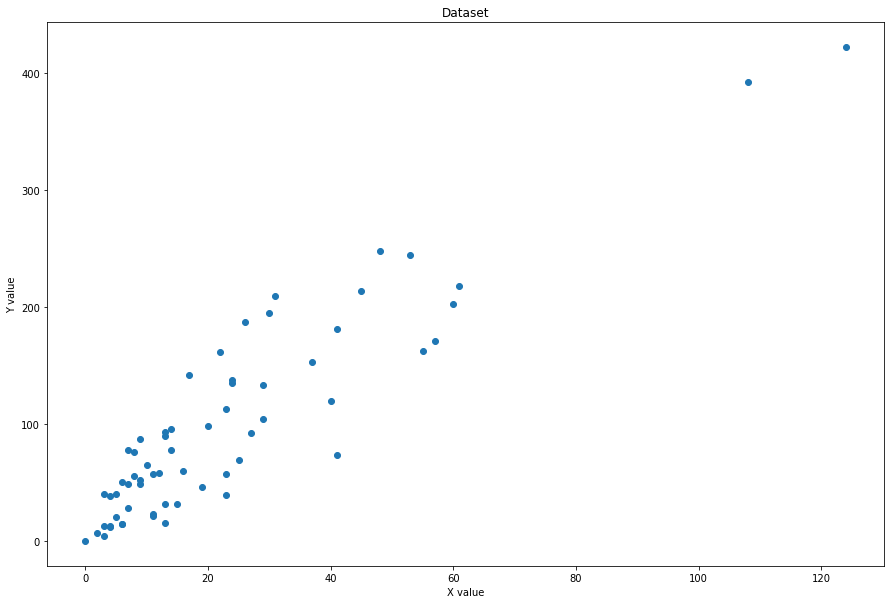

In [124]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.scatter(dd['X'],dd['Y'])
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title('Dataset')
plt.show()

In [95]:

# Estimate Mean and Variance
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# calculate mean and variance
x = [float(row[0]) for row in dataset]
y = [float(row[1]) for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=22.905 variance=33809.429
y stats: mean=98.187 variance=472818.290


In [96]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 115419.424


In [97]:
def coefficients(dataset):
    x = [float(row[0]) for row in dataset]
    y = [float(row[1]) for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 
# calculate coefficients
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=19.994, B1=3.414


In [98]:

from math import sqrt

In [99]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [113]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse,predicted

In [115]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions
 

In [117]:
rmse,predicted = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[388.68743024628236, 84.85713340037577, 64.37419203997757, 443.30860720734427, 156.54742816176946, 214.5824286828977, 98.51242764064123, 67.78801560004393, 173.6165459621013, 54.13272135977847, 37.06360355944664, 183.8580166423004, 57.54654491984484, 98.51242764064123, 43.89125067957937, 26.82213287924754, 101.92625120070761, 40.47742711951301, 30.23595643931391, 98.51242764064123, 40.47742711951301, 50.71889779971211, 50.71889779971211, 30.23595643931391, 118.99536900103944, 43.89125067957937, 33.64977999938027, 88.27095696044213, 43.89125067957937, 33.64977999938027, 19.99448575911481, 105.34007476077397, 40.47742711951301, 37.06360355944664, 95.09860408057487, 57.54654491984484, 228.23772292316318, 60.96036847991121, 33.64977999938027, 74.61566272017667, 64.37419203997757, 224.82389936309679, 159.96125172183582, 146.30595748157037, 207.75478156276498, 159.96125172183582, 57.54654491984484, 112.1677218809067, 47.30507423964574, 30.23595643931391, 78.02948628024305, 64.37419203997757,

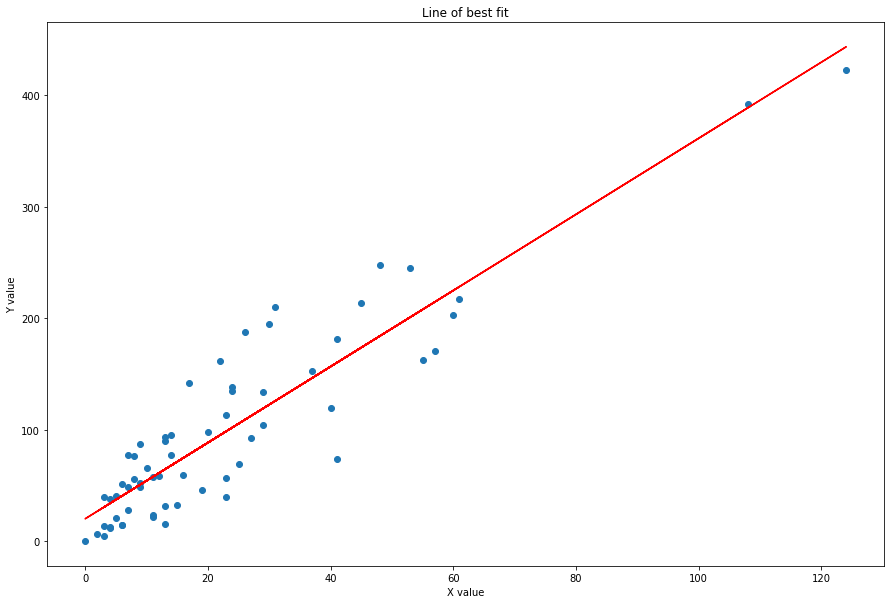

In [125]:

#Plot dataset
plt.scatter(dd['X'],dd['Y'])
#Predict y values
pred = predicted
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title('Line of best fit')
plt.show()

## Sklearn Linear regression

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


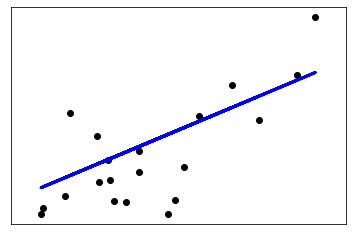

In [104]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Sklearn Basic Example

In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

print(reg.coef_)

print(reg.intercept_) 

reg.predict(np.array([[3, 5]]))


[1. 2.]
3.0000000000000018


array([16.])